# Test Word Embedding

In [ ]:
import os
import sys

import re
import random

import pickle

import jieba
from tqdm import tqdm

from glob import glob


ordered_design_keys = ['基础廓形', '肩', '门襟', '结构', '腰节', '摆', '领型']

design_vars = {
    "基础廓形": ['H型', 'X型', 'A型', 'O型', 'T恤', '紧身', '宽松', '合体'],
    "结构": ['无省', '收腰省', '袖窿公主线分割', '直线公主线分割', '公主线', '公主缝'],
    "腰节": ['无腰节', '断腰节', '拼腰节', '抽皱腰节', '单向褶', '风琴折'],
    "摆": ['无摆', '荷叶摆', '荷叶边', '木耳边', '拼接抽皱', '不规则下摆', '两侧长中间短下摆', '前短后长下摆'],
    "领型": ['有领', '无领', 'V领', '圆领', '椭圆形领', 'U型领', '马蹄型领', '缺口领', '叠领', '套装领', '打裥领', '荡领', '心型领', '船领', '梯形领', '鸡心领', '高领', '高垂领', '锁孔领', '花瓣型领', '漏斗领', '水滴领', '亨利领', '抽绳式立领', '方领', '不对称领', '钻石领', '船员领', '立领', '衬衫领', '木耳边领', '娃娃领', '海军领', '蕾丝花边领', '切尔西式领', '中式马褂型领', '开领', '离颈领', '小丑领', '燕子领', 'POLO领', '连身立领'],
    "门襟": ['无门襟', '交叉门襟', '叠门襟', '半开门襟'],
    "肩": ['正常肩', '正肩', '落肩', '连身袖', '连身插角袖插块', '连身插角袖插片', '插肩袖'],
    "袖": ['无袖', '小飞袖', '天使款大衣袖', '袖山抽皱泡泡袖', '一片袖', '两片袖', '露肩袖', '藕节袖', '羊腿袖', '漏斗袖', '喇叭袖', '宝塔袖', '淑女袖', '缺角袖', '主教服式袖', '泡泡袖', '灯笼袖', '气球型袖', '蝴蝶袖', '层叠袖', '手帕袖', '衬衫袖', '木耳袖口', '娜塔夫袖口']
}

####################### 1. Load data items (RAW) #######################
# data_roots = [
#     "\\\\192.168.29.222\\Share\\工程数据Q1\\objs", 
#     # "\\\\192.168.29.222\\Share\\工程数据Q2_objs"
#     ]
# all_items = []
# print(">>> Locating data items...")
# for data_root in data_roots:
#     cur_items = glob(os.path.join(data_root, '**', 'pattern.json'), recursive=True)
#     cur_items = [os.path.dirname(x) for x in cur_items]
#     all_items += cur_items
#     print("%d items in %s."%(len(cur_items), data_root))
# print('[DONE] locating data items, total %d items.'%(len(all_items)))
########################################################################

####################### 2. Load data items (PICKLE) #######################
# data_root = "E:\\lry\\data\\AIGP\\demo_v2\\Q2\\brep_uni_norm\\"
# data_dirs = glob(os.path.join(data_root, '*.pkl'))
# all_items = []
# for data_item in tqdm(data_dirs):
#     with open(data_item, "rb") as tf: data = pickle.load(tf)
#     data_fp = os.path.basename(data['data_fp'])
#     data_fp = re.sub(r'\d+', '', data_fp).replace('-', '').replace('_', '').strip().upper()
#     all_items.append(data_fp)
# print('[DONE] Loading data items: ', len(all_items), all_items[:10])
###########################################################################


####################### 3. Load data items (JSON) #######################
data_root = "E:\\lry\\data\\AIGP\\demo_v2\\Q2\\patterns\\"
data_dirs = glob(os.path.join(data_root, '*.json'))
all_items = []
for data_item in tqdm(data_dirs):
    with open(data_item, "rb") as tf: data = pickle.load(tf)
    data_fp = os.path.basename(data['data_fp'])
    data_fp = re.sub(r'\d+', '', data_fp).replace('-', '').replace('_', '').strip().upper()
    all_items.append(data_fp)
print('[DONE] Loading data items: ', len(all_items), all_items[:10])
###########################################################################


print('>>> Try word cutting...')
jieba.load_userdict('dict.txt')
total_words = []
with open('word_cut_result.txt', 'w') as f:
    for sentence in tqdm(all_items):
        words = jieba.lcut(sentence, cut_all=False)
        total_words += words
        f.write("%s => %s\n" % (sentence, '|'.join(words)))
print('[DONE] Total words after cut: ', len(total_words))

# total_words = [x.upper() for x in total_words]
# total_words_freq = dict([(x, total_words.count(x)) for x in total_words if x.strip()])
# total_words_freq = sorted(total_words_freq.items(), key=lambda x: x[1], reverse=True)    

# design_var_dict = {}
# for key in design_vars:
#     for val in design_vars[key]:
#         design_var_dict[val] = key

# totel_words_freq_category = {"其他": []}
# for word, freq in total_words_freq:
#     word = word.strip()
#     if not word: continue
#     elif word.upper() in design_var_dict:
#         if design_var_dict[word] not in totel_words_freq_category: totel_words_freq_category[design_var_dict[word]] = []
#         totel_words_freq_category[design_var_dict[word]].append((word, freq))
#     else:
#         totel_words_freq_category["其他"].append((word, freq))

# with open('word_freq.txt', 'w') as f:
#     for key in design_vars.keys():
#         f.write(key+':\n')
#         for word, freq in totel_words_freq_category[key]:
#             if word.strip() == '': continue
#             f.write('\t'+word+' '+str(freq)+'\n')
#         f.write('\n')
#     f.write("其他:\n")
#     for word, freq in totel_words_freq_category["其他"]:
#         if word.strip() == '': continue
#         if freq < 10: continue
#         f.write('\t'+word+' '+str(freq)+'\n')

In [ ]:
import os
import sys

import re
import random

import json
import pickle

import jieba
from tqdm import tqdm

from glob import glob


ordered_design_keys = ['基础廓形', '肩', '门襟', '结构', '腰节', '摆', '领型']

design_vars = {
    "基础廓形": ['H型', 'X型', 'A型', 'O型', 'T恤', '紧身', '宽松', '合体'],
    "结构": ['无省', '收腰省', '袖窿公主线分割', '直线公主线分割', '公主线', '公主缝'],
    "腰节": ['无腰节', '断腰节', '拼腰节', '抽皱腰节', '单向褶', '风琴折'],
    "摆": ['无摆', '荷叶摆', '荷叶边', '木耳边', '拼接抽皱', '不规则下摆', '两侧长中间短下摆', '前短后长下摆'],
    "领型": ['有领', '无领', 'V领', '圆领', '椭圆形领', 'U型领', '马蹄型领', '缺口领', '叠领', '套装领', '打裥领', '荡领', '心型领', '船领', '梯形领', '鸡心领', '高领', '高垂领', '锁孔领', '花瓣型领', '漏斗领', '水滴领', '亨利领', '抽绳式立领', '方领', '不对称领', '钻石领', '船员领', '立领', '衬衫领', '木耳边领', '娃娃领', '海军领', '蕾丝花边领', '切尔西式领', '中式马褂型领', '开领', '离颈领', '小丑领', '燕子领', 'POLO领', '连身立领'],
    "门襟": ['无门襟', '交叉门襟', '叠门襟', '半开门襟'],
    "肩": ['正常肩', '正肩', '落肩', '连身袖', '连身插角袖插块', '连身插角袖插片', '插肩袖'],
    "袖": ['无袖', '小飞袖', '天使款大衣袖', '袖山抽皱泡泡袖', '一片袖', '两片袖', '露肩袖', '藕节袖', '羊腿袖', '漏斗袖', '喇叭袖', '宝塔袖', '淑女袖', '缺角袖', '主教服式袖', '泡泡袖', '灯笼袖', '气球型袖', '蝴蝶袖', '层叠袖', '手帕袖', '衬衫袖', '木耳袖口', '娜塔夫袖口']
}


jieba.load_userdict('dict.txt')

####################### 3. Load data items (JSON) #######################
data_root = "E:\\lry\\data\\AIGP\\demo_v2\\Q2\\patterns\\"
# output_root = "E:\\lry\\data\\AIGP\\demo_v2\\Q2\\patterns_with_caption\\"
# os.makedirs(output_root, exist_ok=True)
data_dirs = glob(os.path.join(data_root, '*.json'))
all_items = []
for data_item in tqdm(data_dirs):
    try:
    
        with open(data_item, "r") as tf: pattern_spec = json.load(tf)
        data_caption = os.path.basename(pattern_spec["raw_data_fp"])
        data_caption = re.sub(r'\d+', '', data_caption).replace('-', '').replace('_', '').strip().upper()
        data_caption = jieba.lcut(data_caption, cut_all=False)
        data_caption = [x for x in data_caption if x.strip() != "连衣裙"]
        data_caption = ["连衣裙", ", ".join(data_caption)]
            
        pattern_spec["caption"] = data_caption
        
        # with open(os.path.join(output_root, os.path.basename(data_item)), "w", encoding='utf-8') as tf:
        #     json.dump(pattern_spec, tf, indent=4, ensure_ascii=False)
    
    except Exception as e:
        print('[ERROR] ', data_item, e)
    
###########################################################################

# Test GME Embedding && Retrieval

In [1]:
import os
import sys

os.environ["TOKENIZERS_PARALLELISM"] = "false"

import numpy as np

import torch

from PIL import Image
from glob import glob

from pymilvus import MilvusClient

from src.llm_utils.gme_inference import GmeQwen2VL

ref_data_root = 'resources/examples/test_annotation/qwen_annotations_1'

ref_dataset = []

# print(os.listdir(ref_data_root))

# print(glob(os.path.join(ref_data_root, '*.md')))

gme_embedder = GmeQwen2VL(
    model_path='/data/lry/models/gme-Qwen2-VL-2B-Instruct')

data = []
for idx, ref_data_id in enumerate([os.path.basename(x).split('.')[0] for x in glob(os.path.join(ref_data_root, '*.md'))]):

    ref_sketch = os.path.join(ref_data_root, ref_data_id + '_sil.png')
    ref_image = os.path.join(ref_data_root, ref_data_id + '.png')

    ref_desc_fp = os.path.join(ref_data_root, ref_data_id + '.md')
    with open(ref_desc_fp, 'r') as f: ref_desc = f.read()

    emb_vec = gme_embedder.get_fused_embeddings(texts=[ref_desc], images=[ref_sketch])
    print(idx, 'emb_vec: ', emb_vec.shape)

    data.append({
        "id": idx,
        "vector": emb_vec.squeeze().detach().cpu().numpy().astype(np.float32),
        "data_id": ref_data_id,
        "desc_fp": ref_desc_fp,
        "sketch_fp": ref_sketch,
        "img_fp": ref_image
    })

client = MilvusClient("stylexd_retrieval.db")
client.create_collection(collection_name="stylexd_simple_retrieval", dimension=1536)
res = client.insert(collection_name="stylexd_simple_retrieval", data=data)

/home/code/style3d_gen/src/llm_utils/gme_inference.py:12: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.83it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.41s/it]


0 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


1 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


2 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


3 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


4 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


5 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]


6 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


7 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


8 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


9 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


10 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


11 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


12 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


13 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


14 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


15 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


16 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


17 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


18 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


19 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


20 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


21 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


22 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


23 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


24 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


25 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


26 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


27 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


28 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


29 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


30 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


31 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


32 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


33 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


34 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


35 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


36 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


37 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


38 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


39 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


40 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


41 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


42 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


43 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


44 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


45 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


46 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]


47 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


48 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


49 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


50 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


51 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


52 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


53 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


54 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


55 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]


56 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


57 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


58 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/it]


59 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


60 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


61 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]


62 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]


63 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


64 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


65 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


66 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


67 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]


68 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


69 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


70 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


71 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]


72 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


73 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


74 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


75 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


76 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


77 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


78 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


79 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


80 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


81 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


82 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


83 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


84 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


85 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


86 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


87 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


88 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


89 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


90 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


91 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


92 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


93 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


94 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


95 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


96 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


97 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


98 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


99 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


100 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


101 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


102 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


103 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


104 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


105 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


106 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


107 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


108 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


109 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


110 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


111 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


112 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


113 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


114 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


115 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


116 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


117 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.10s/it]


118 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


119 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


120 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


121 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


122 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


123 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


124 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


125 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


126 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


127 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


128 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


129 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


130 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


131 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


132 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.00it/s]


133 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.10it/s]


134 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


135 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


136 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


137 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.12it/s]


138 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


139 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


140 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.08it/s]


141 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


142 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.13it/s]


143 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


144 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


145 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


146 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


147 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


148 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


149 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]


150 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


151 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


152 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


153 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]


154 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


155 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


156 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


157 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


158 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


159 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.04it/s]


160 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


161 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


162 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06it/s]


163 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


164 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


165 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.08s/it]


166 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.03it/s]


167 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


168 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]


169 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.05it/s]


170 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.11it/s]


171 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


172 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]


173 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]


174 emb_vec:  torch.Size([1, 1536])


encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.39it/s]


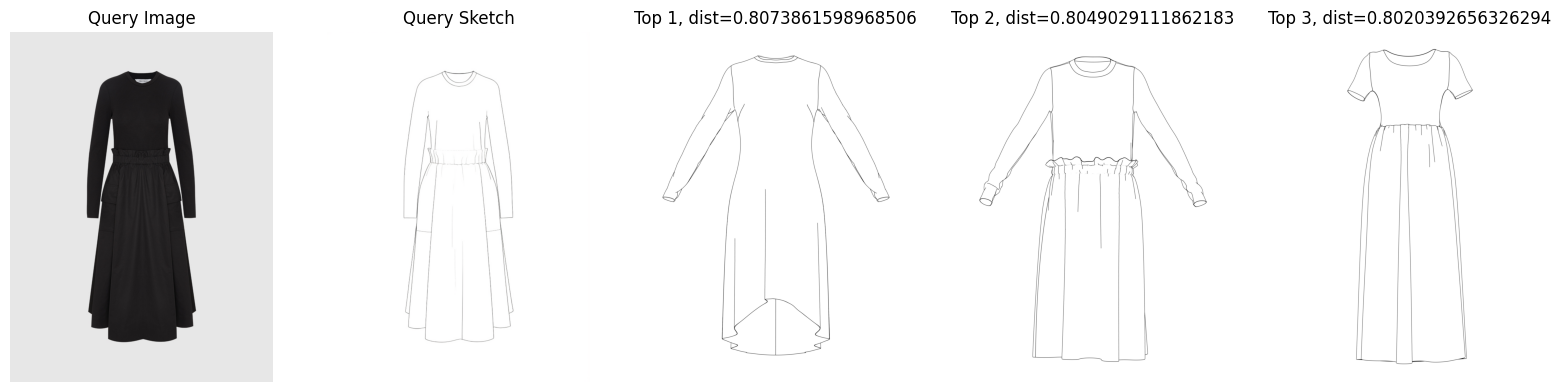

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.43it/s]


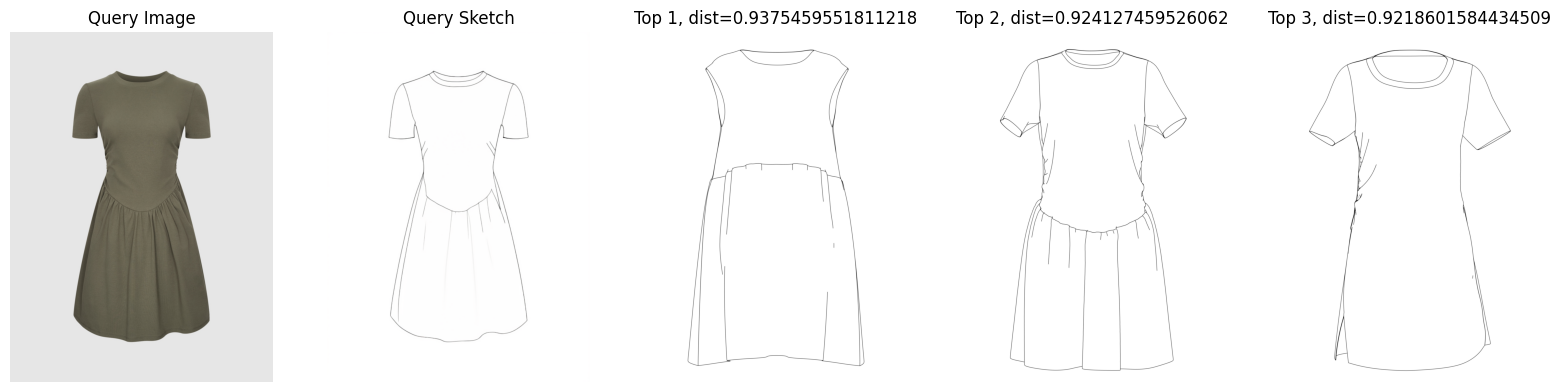

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


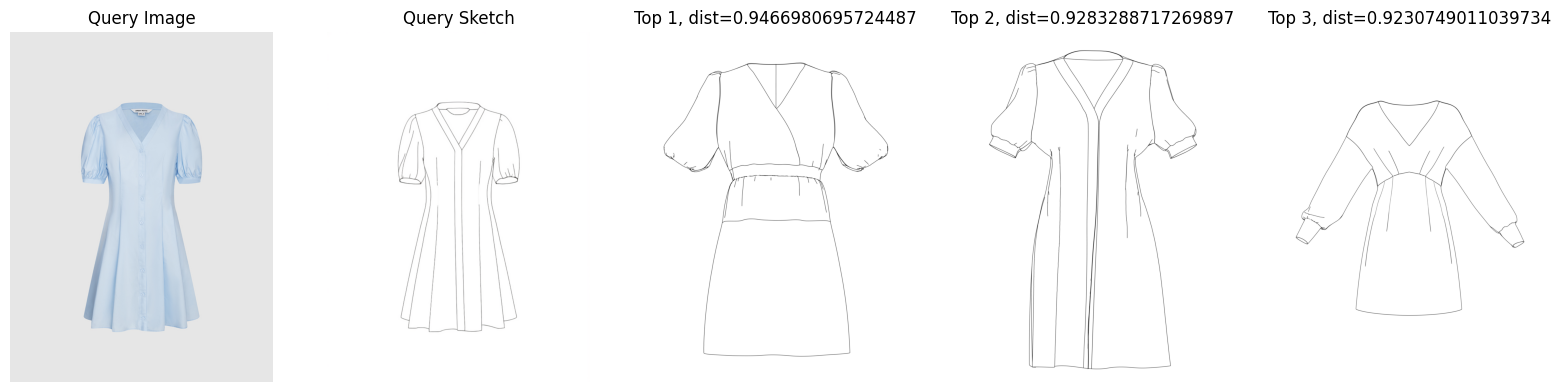

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


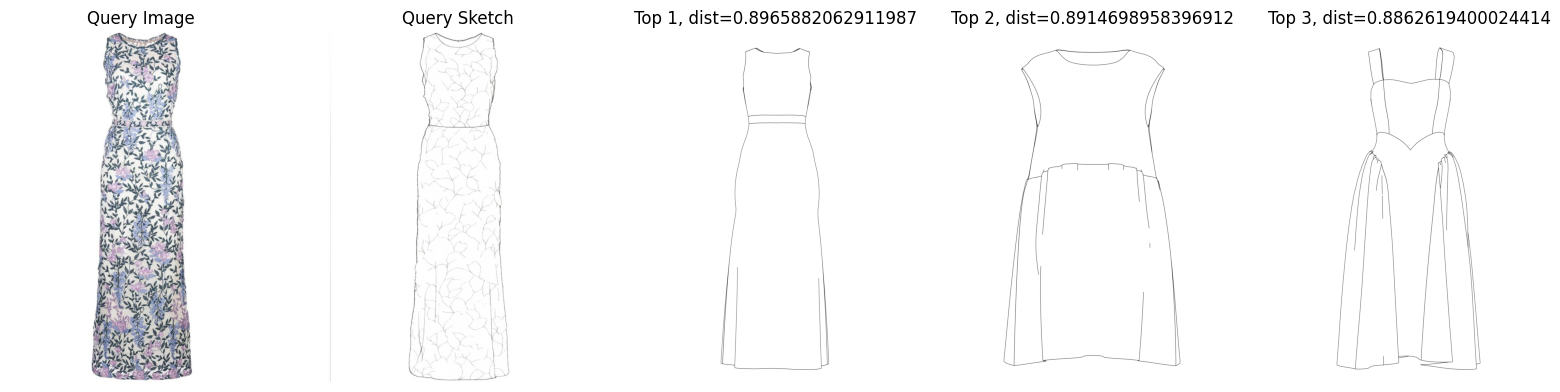

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]


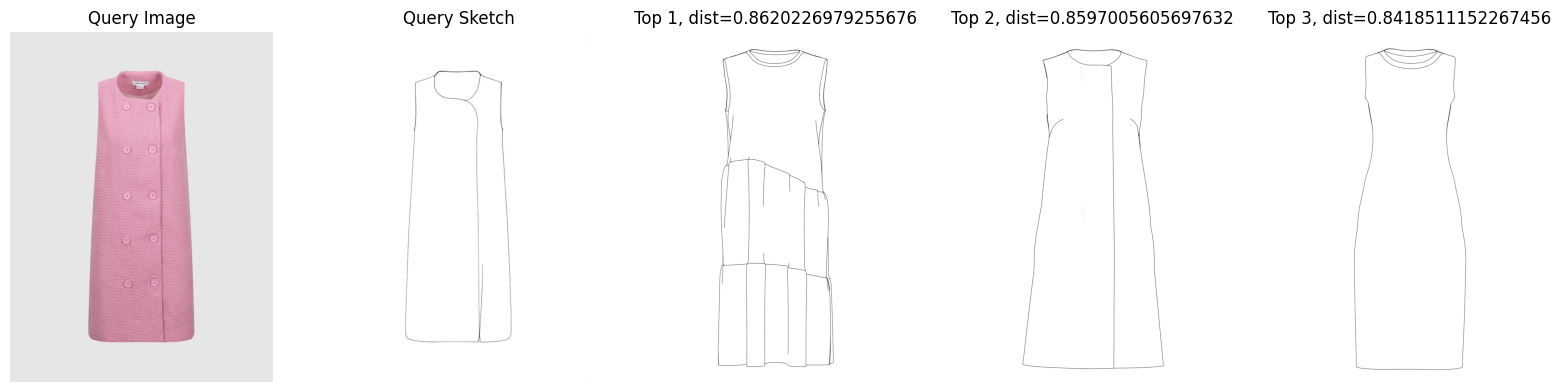

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


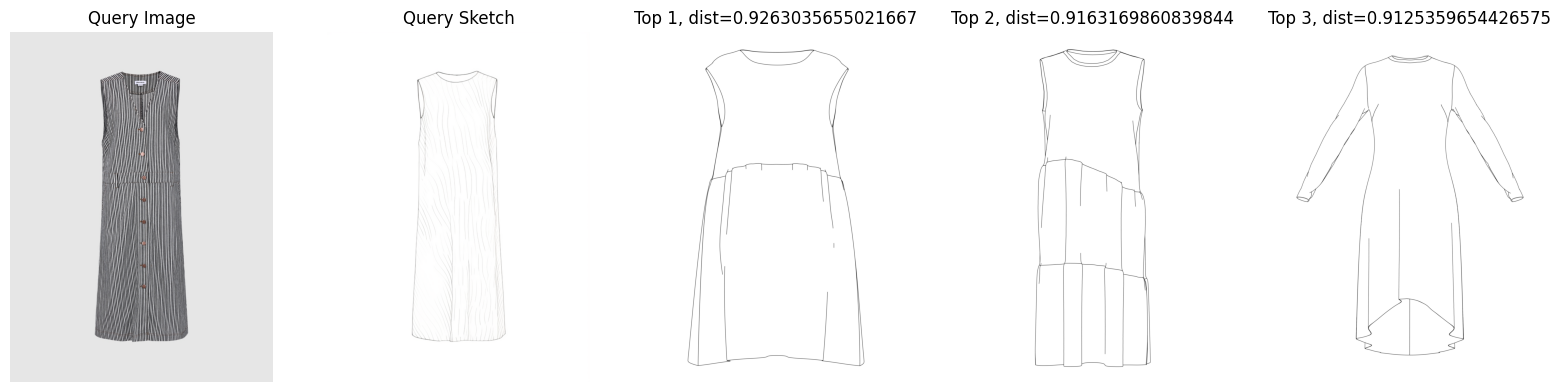

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


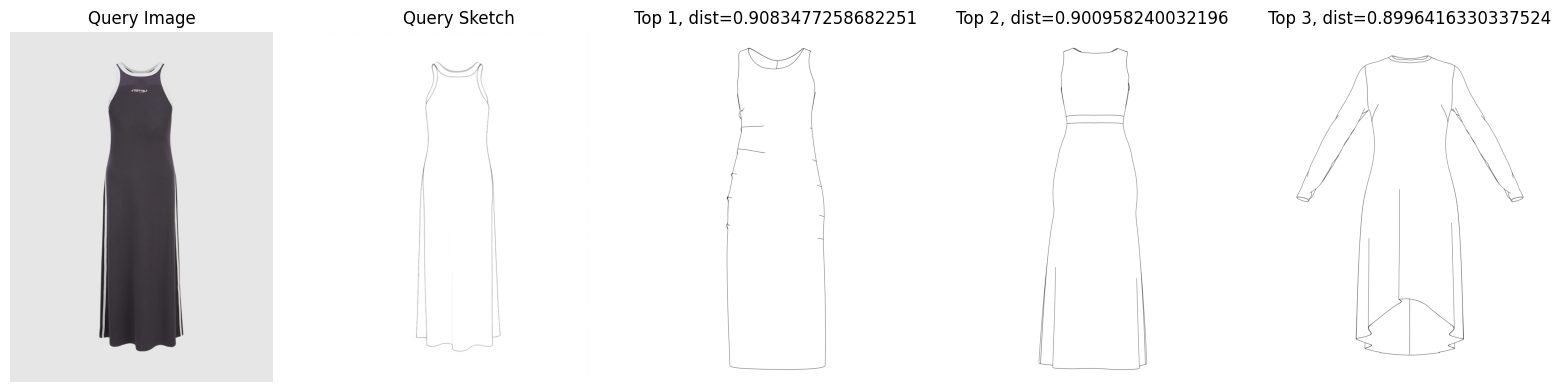

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.40it/s]


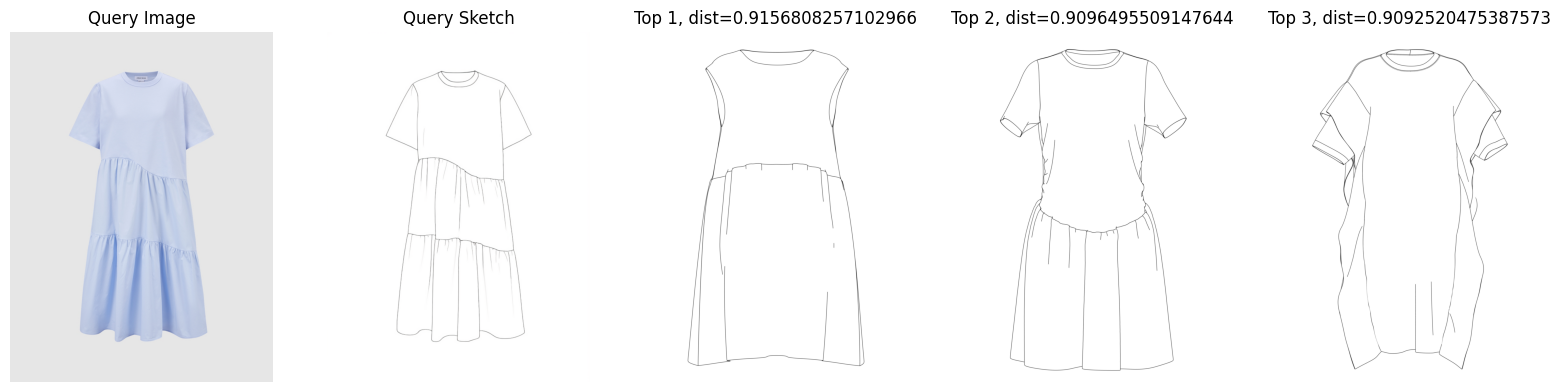

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]


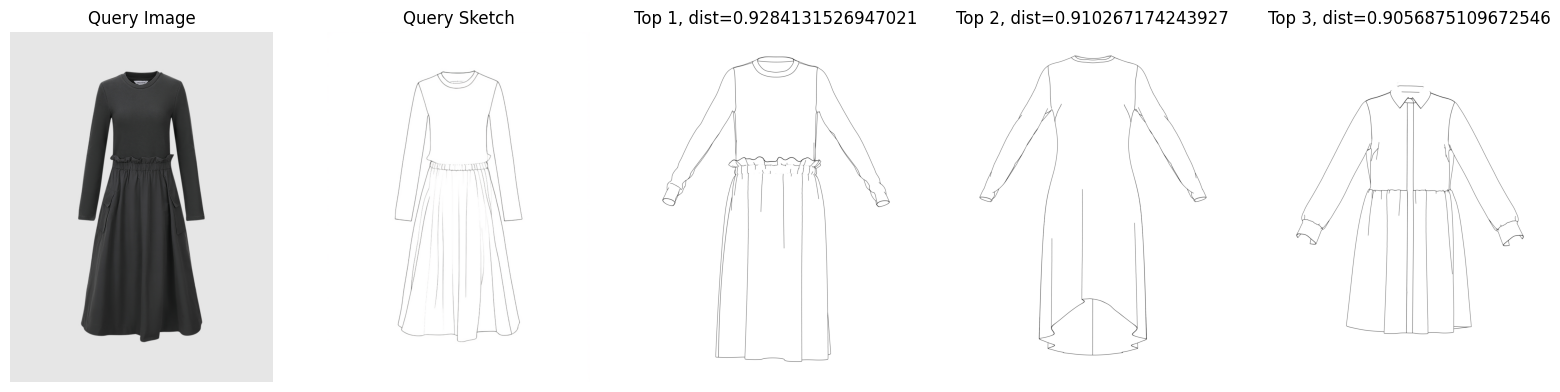

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


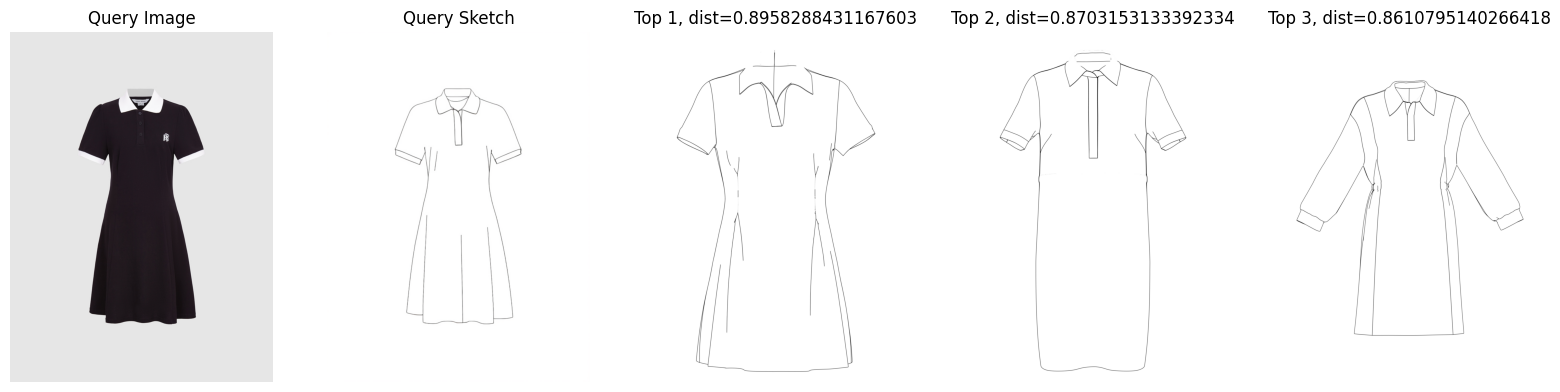

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]


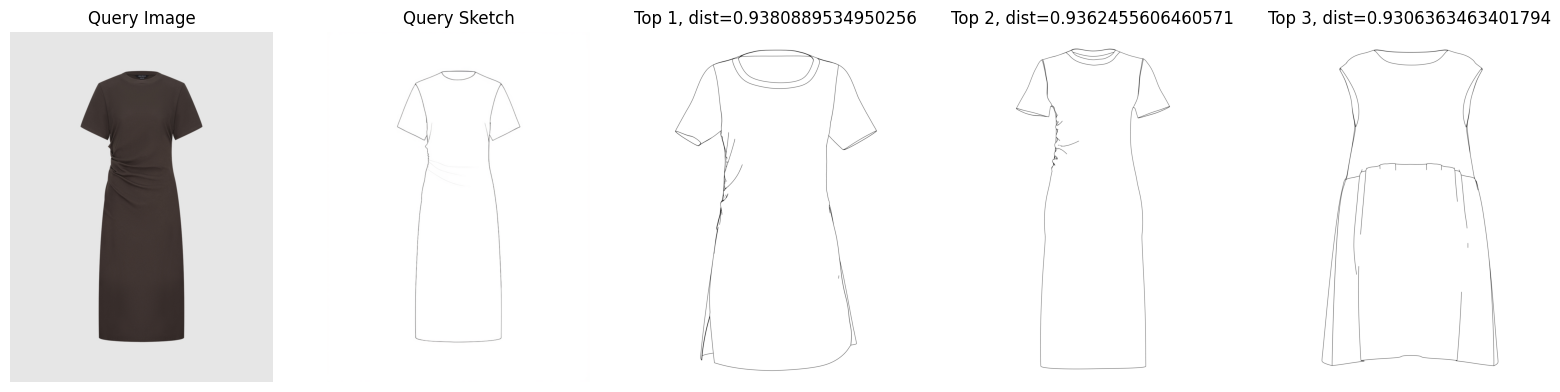

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]


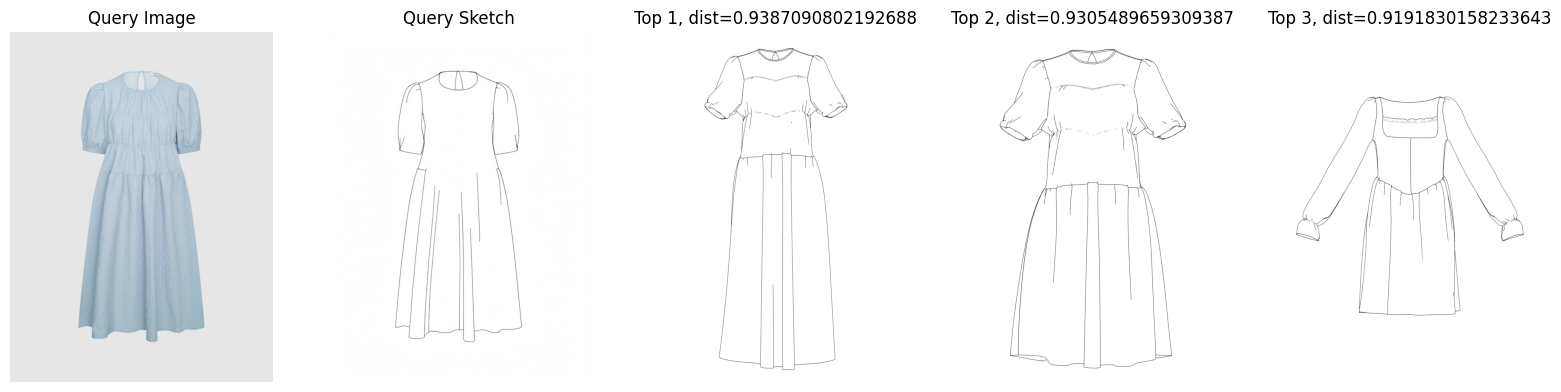

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]


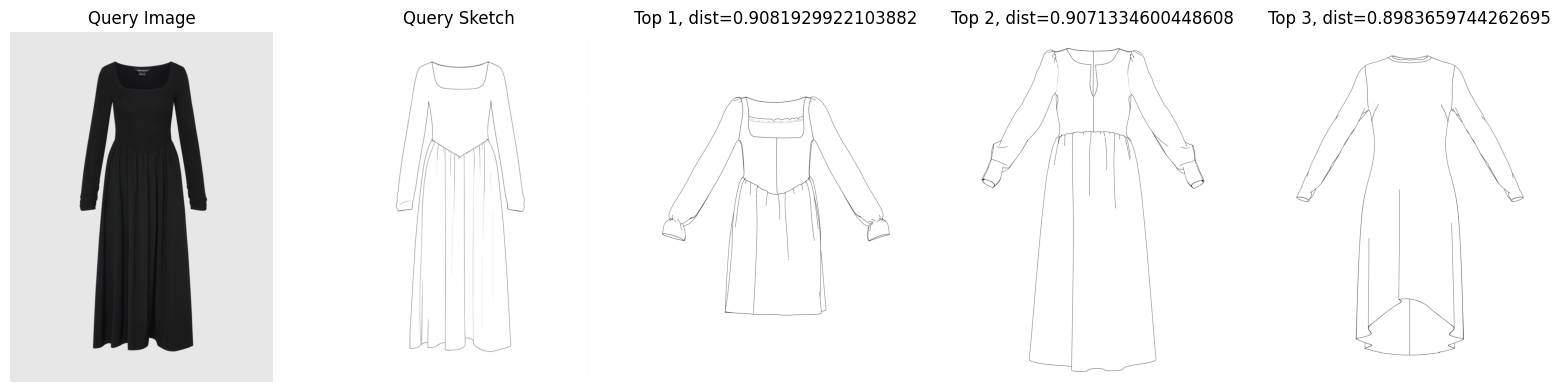

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


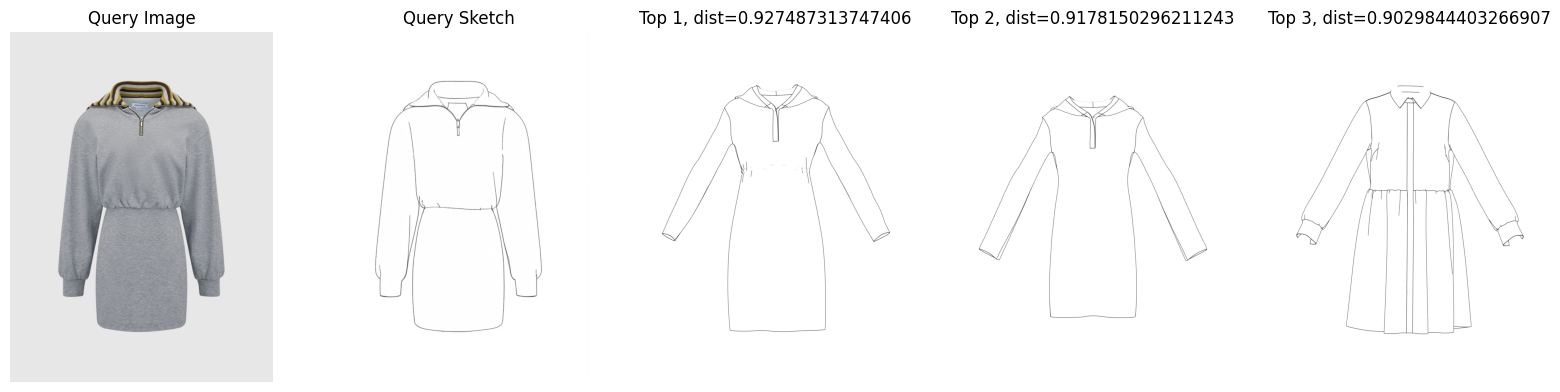

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.23it/s]


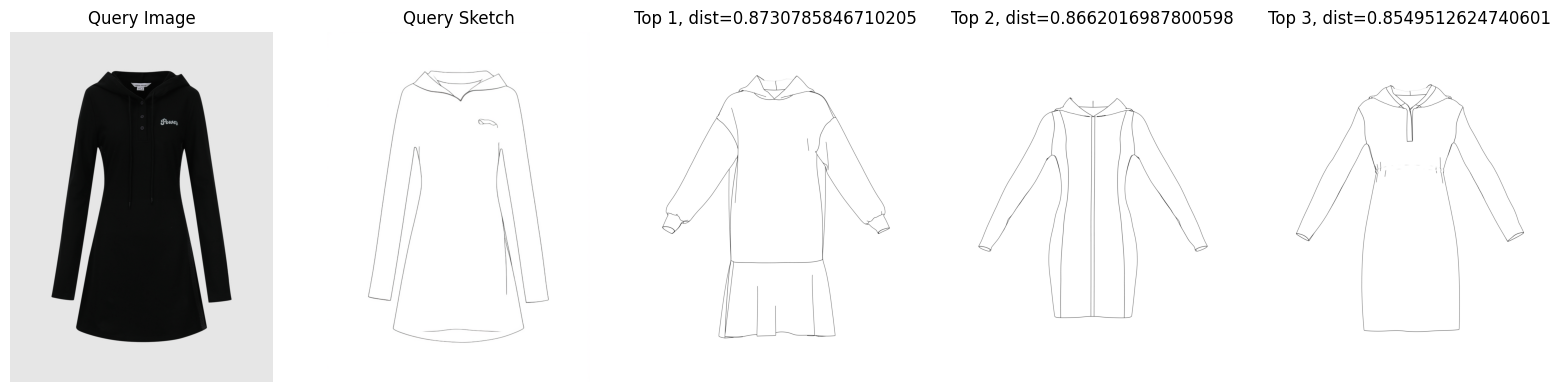

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


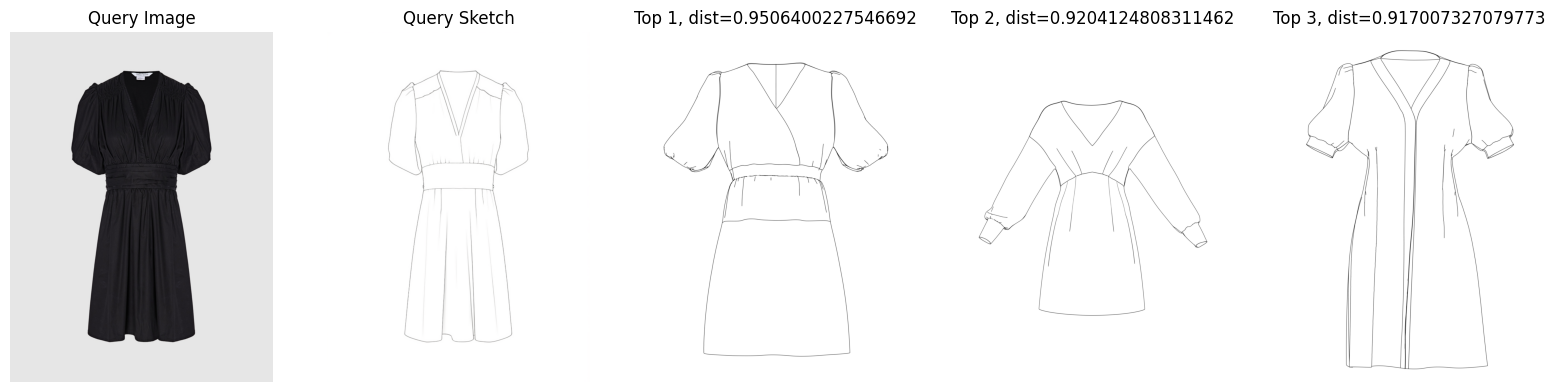

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.23it/s]


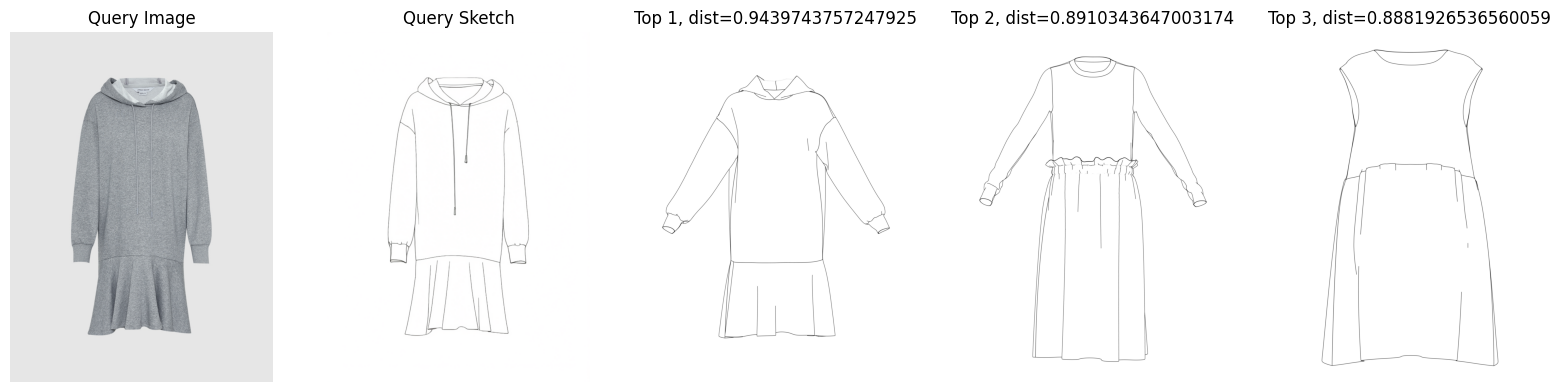

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


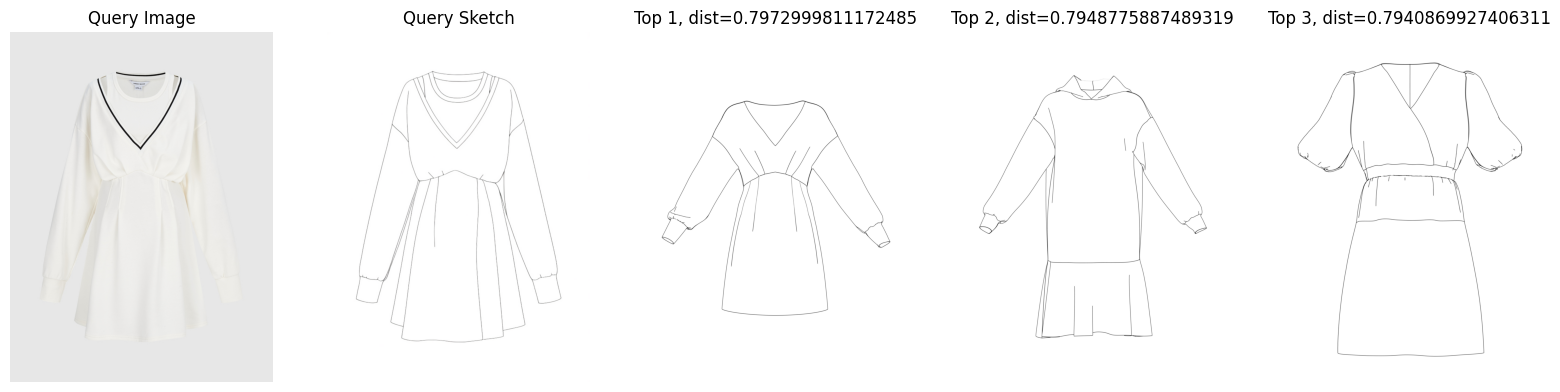

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


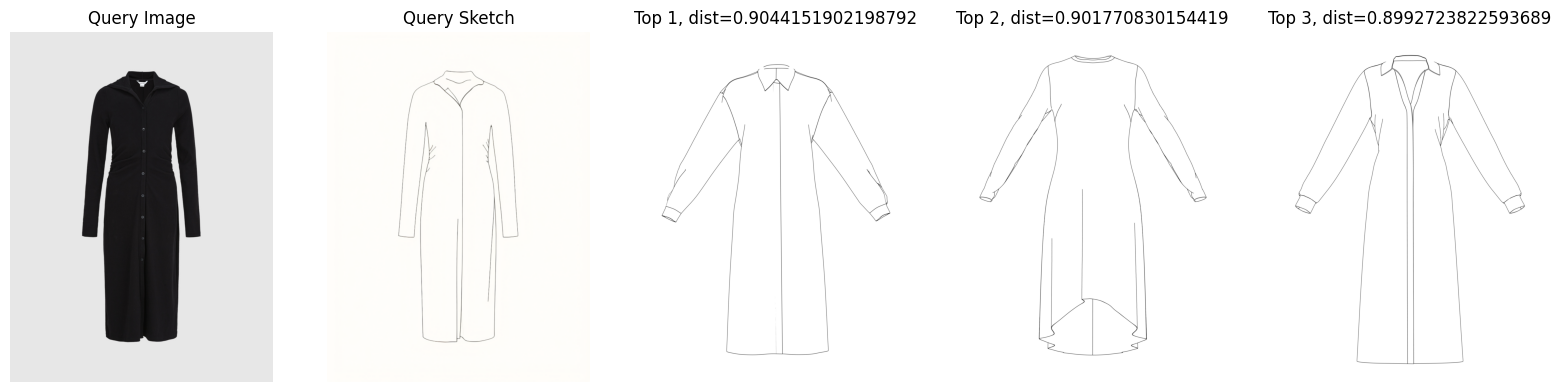

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


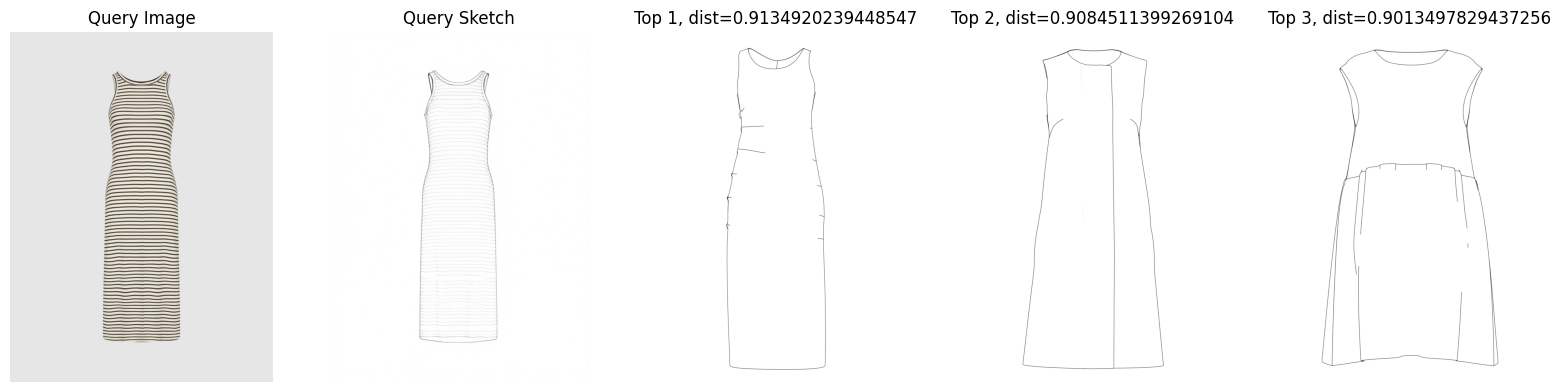

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.34it/s]


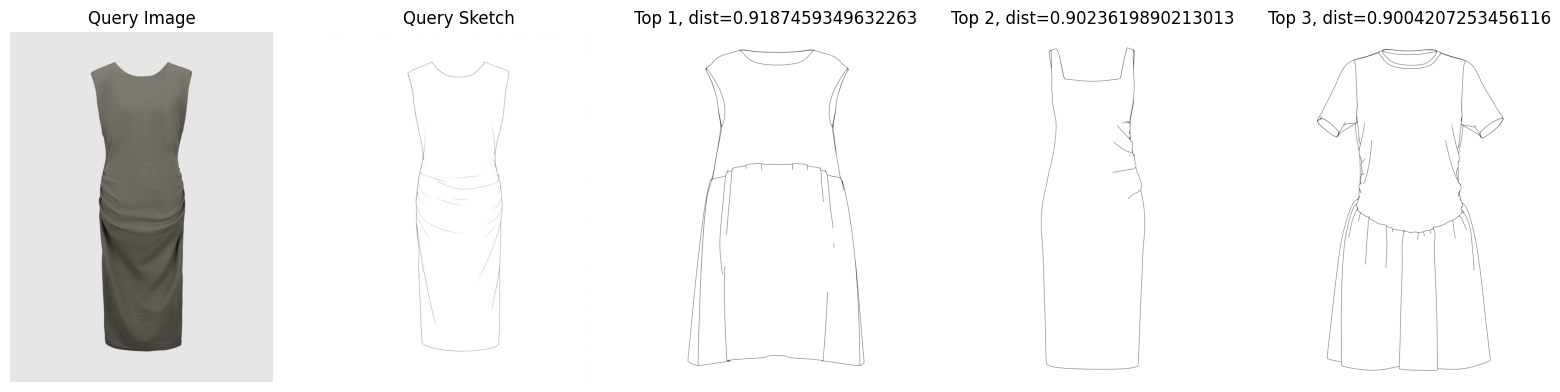

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]


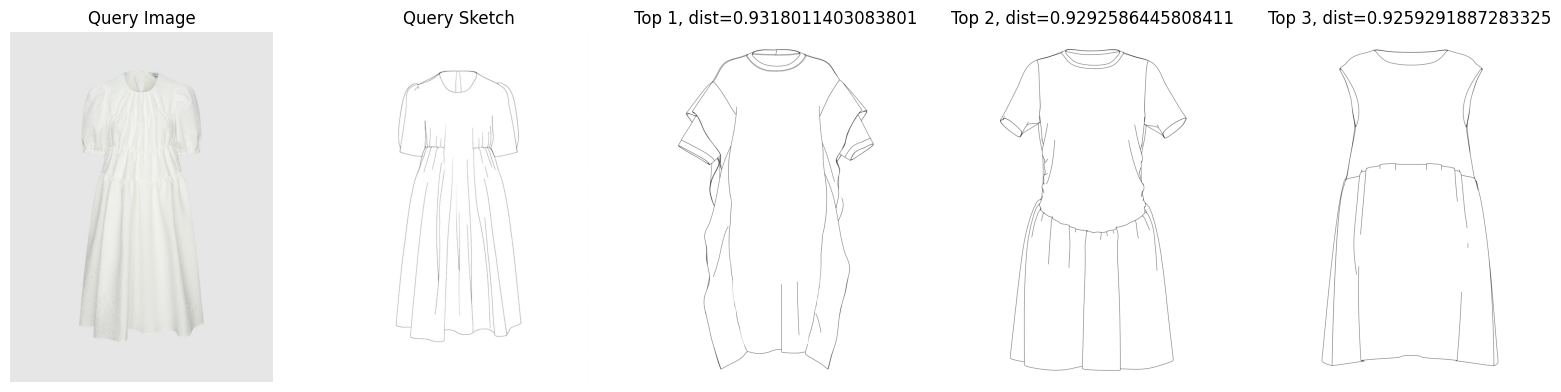

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.22it/s]


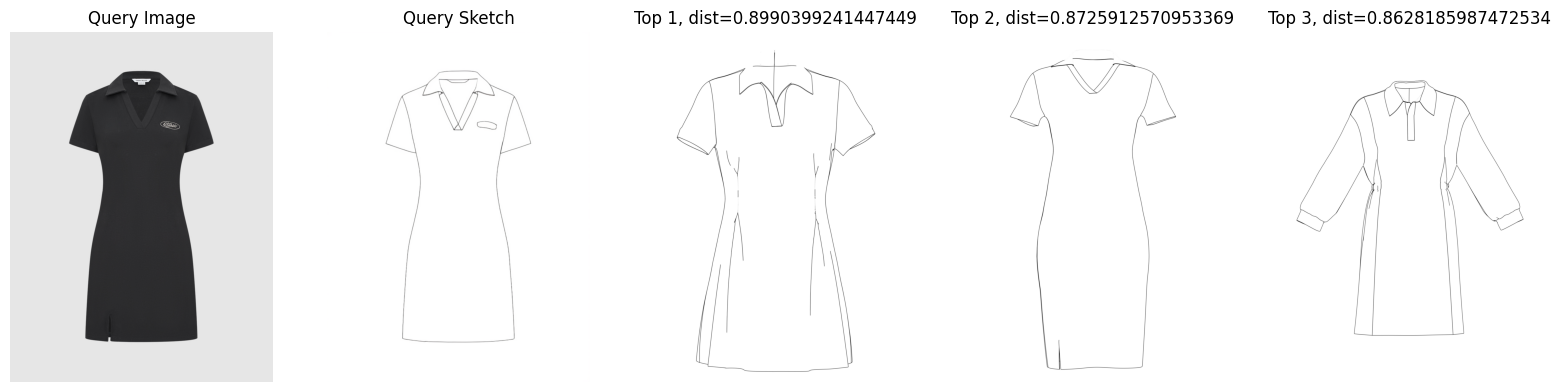

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


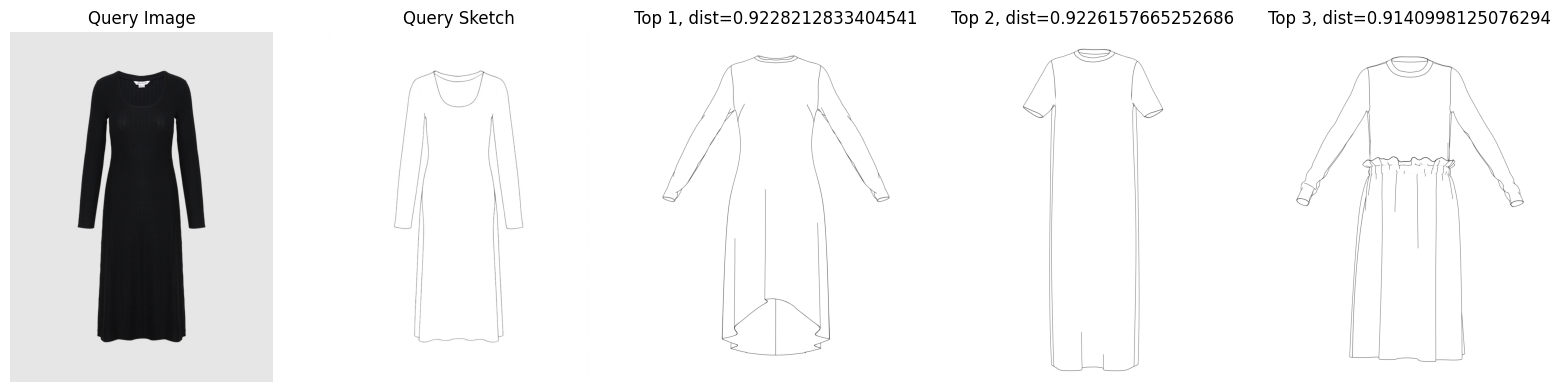

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


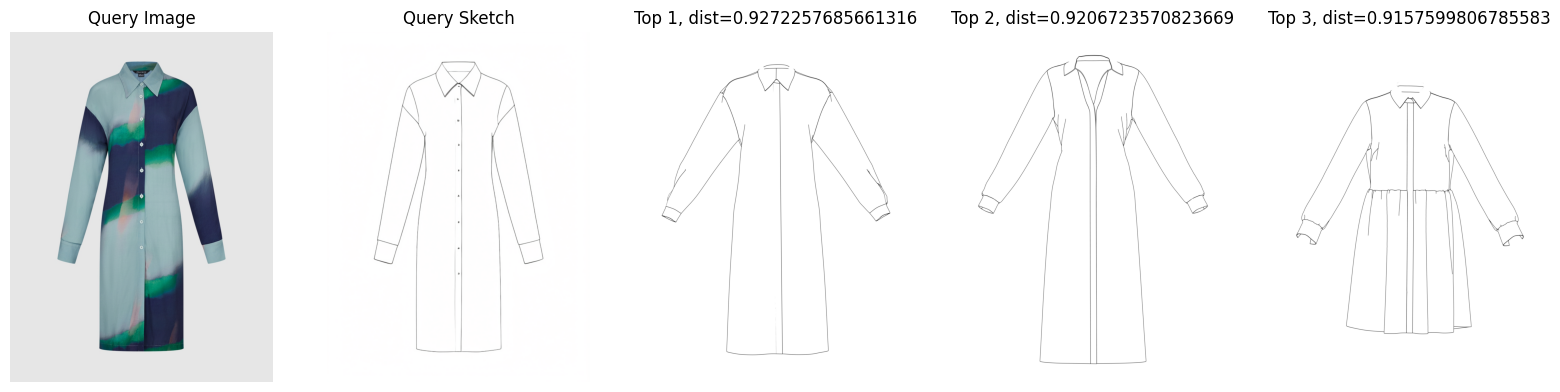

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.35it/s]


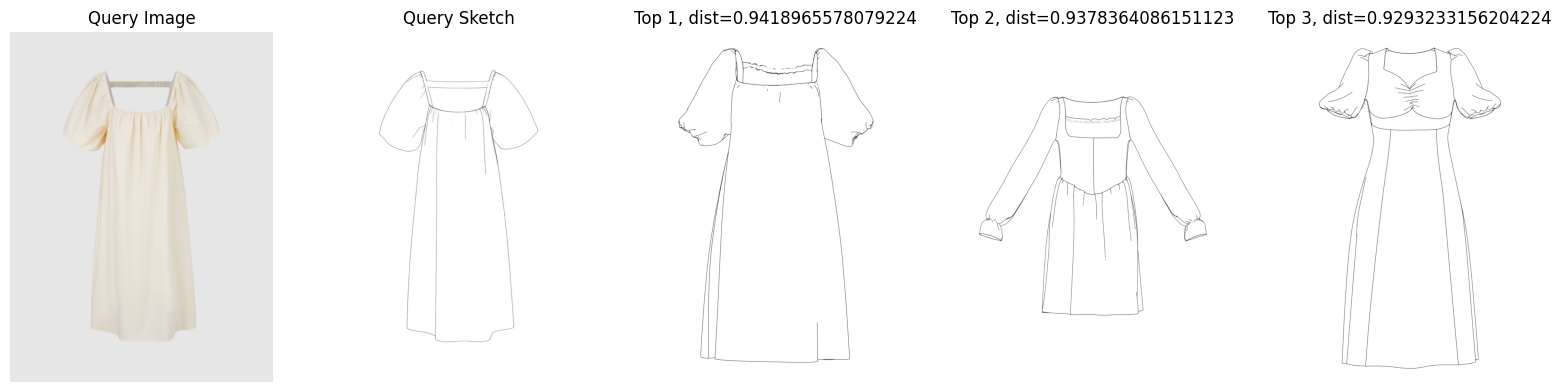

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]


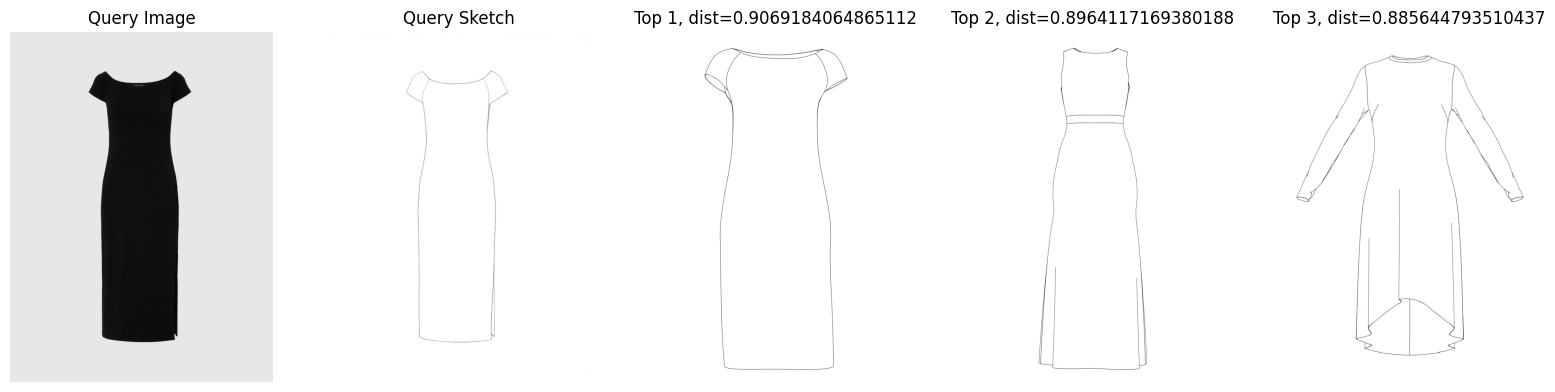

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]


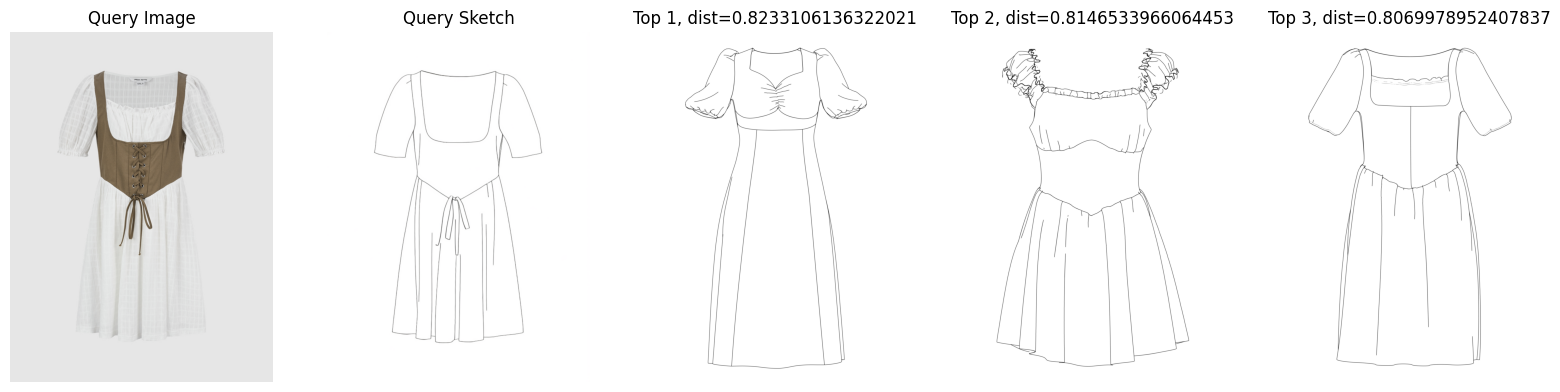

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]


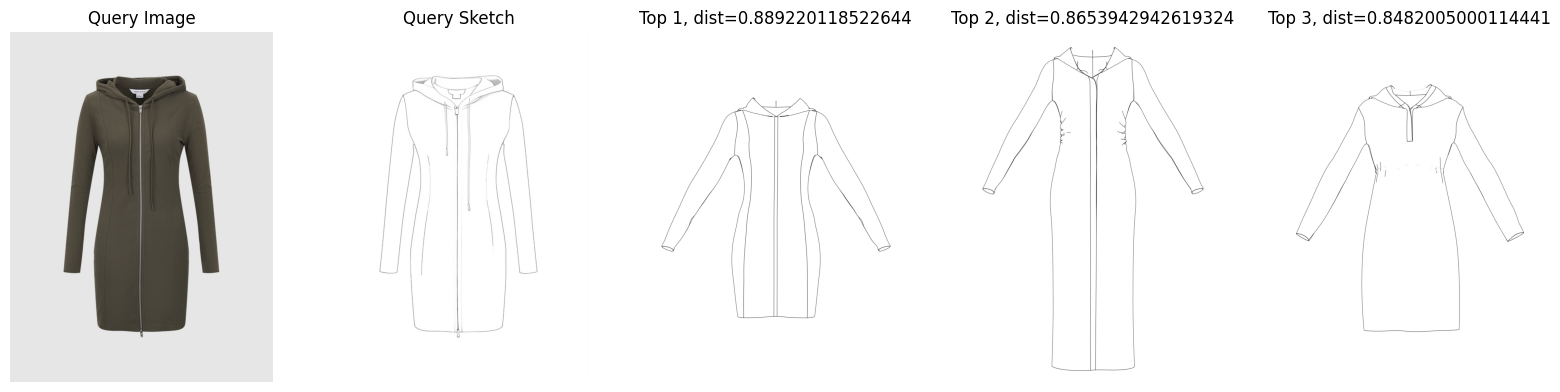

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]


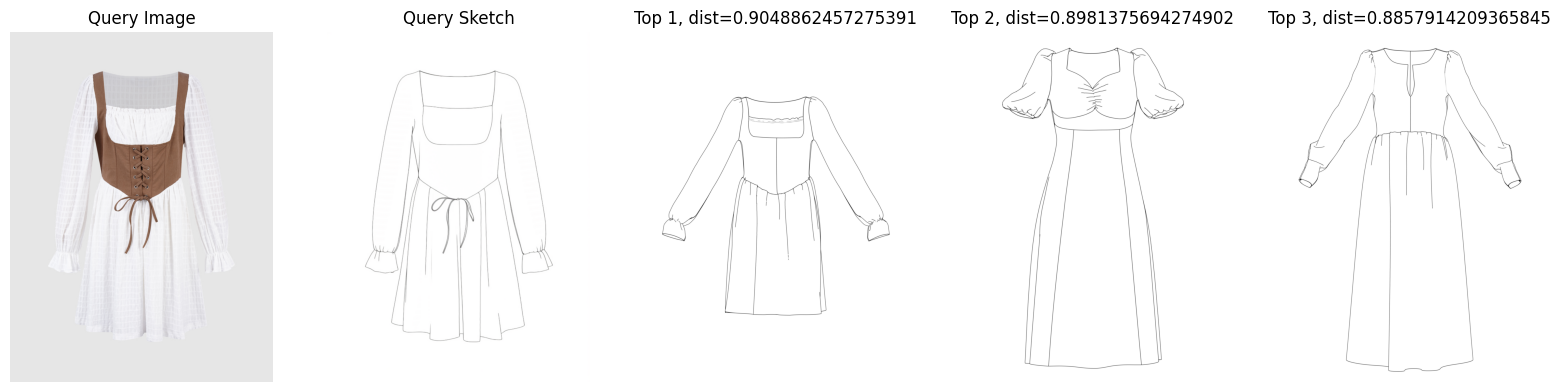

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


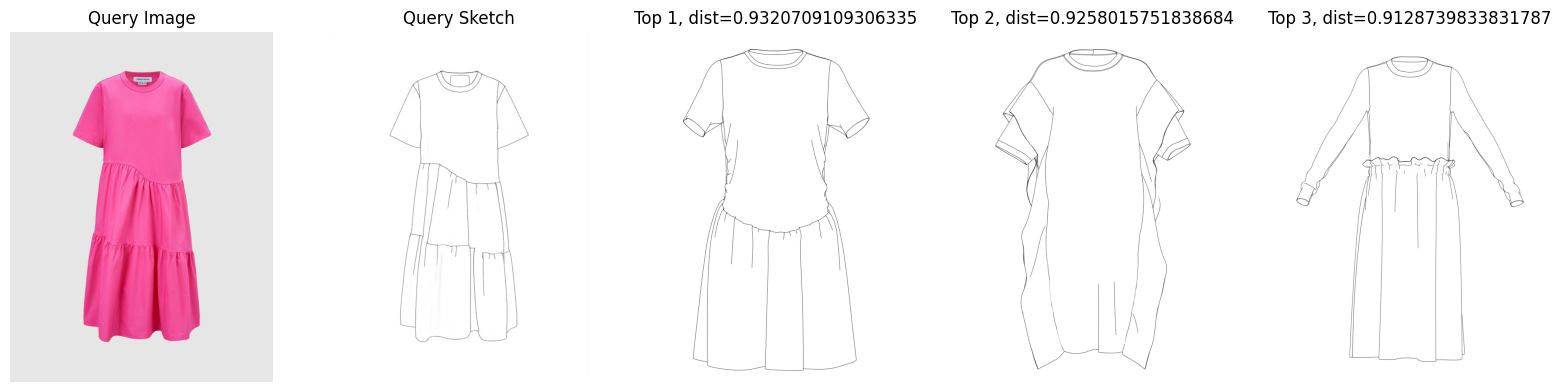

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.21it/s]


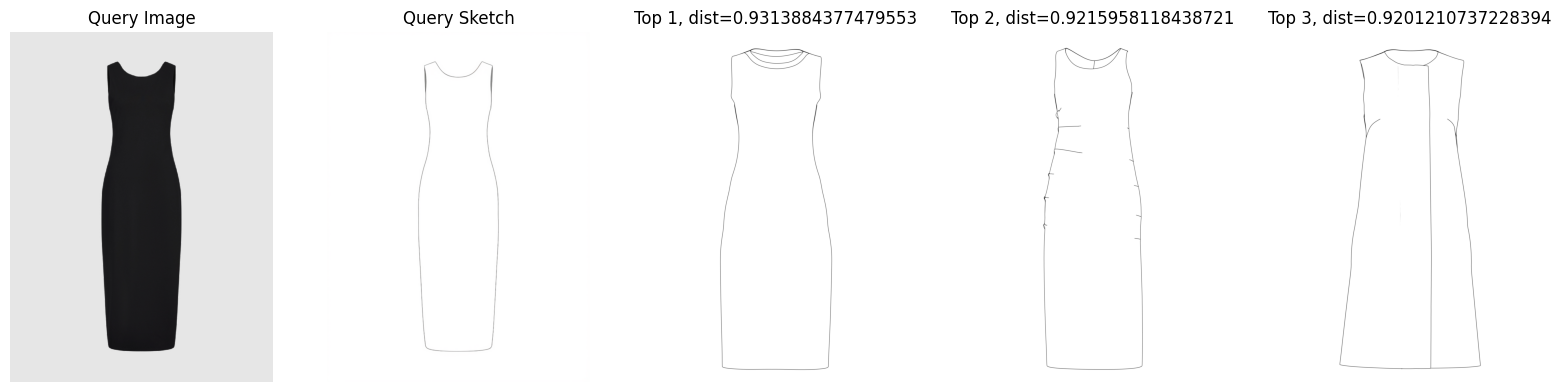

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


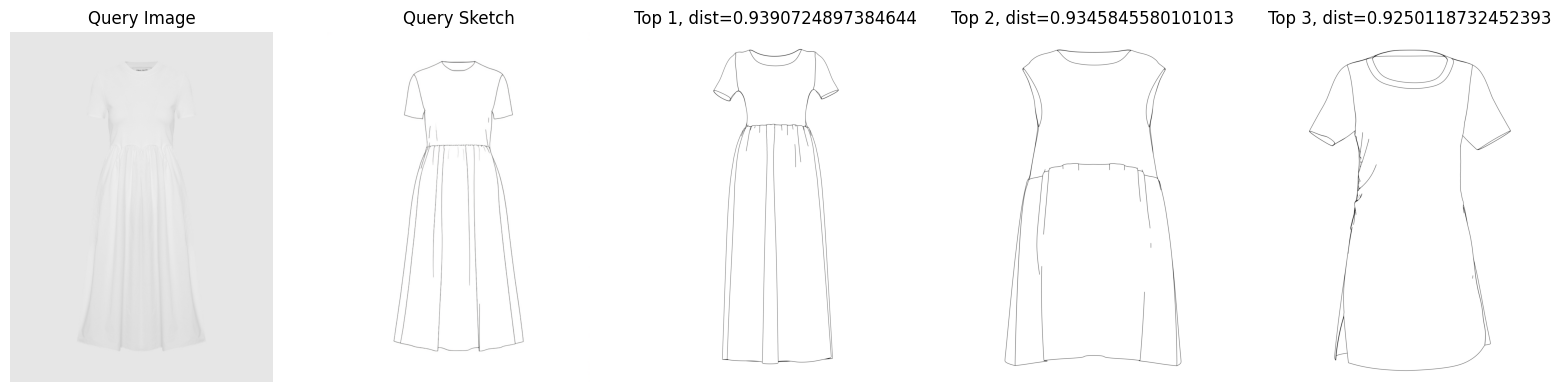

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.17it/s]


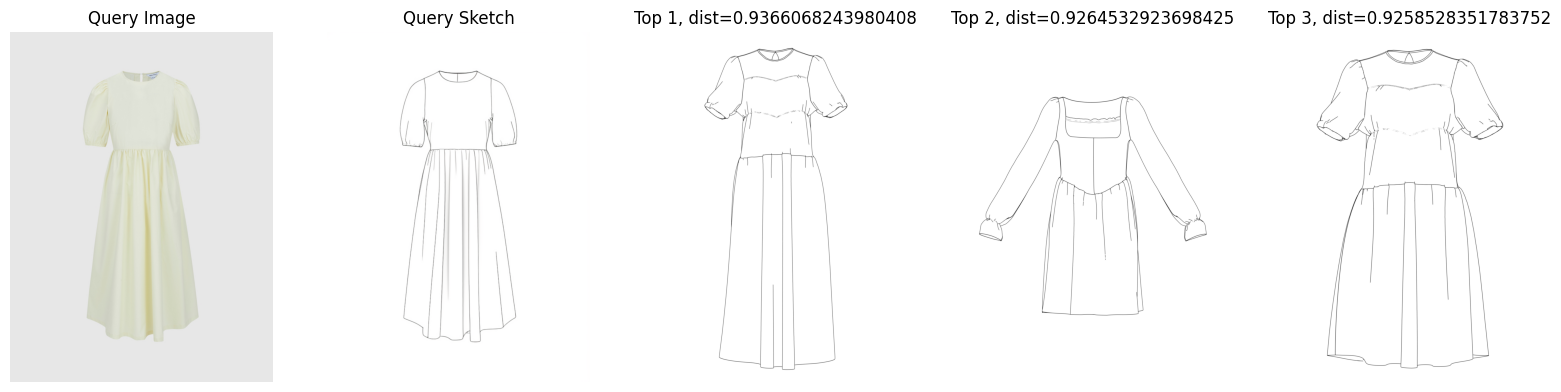

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


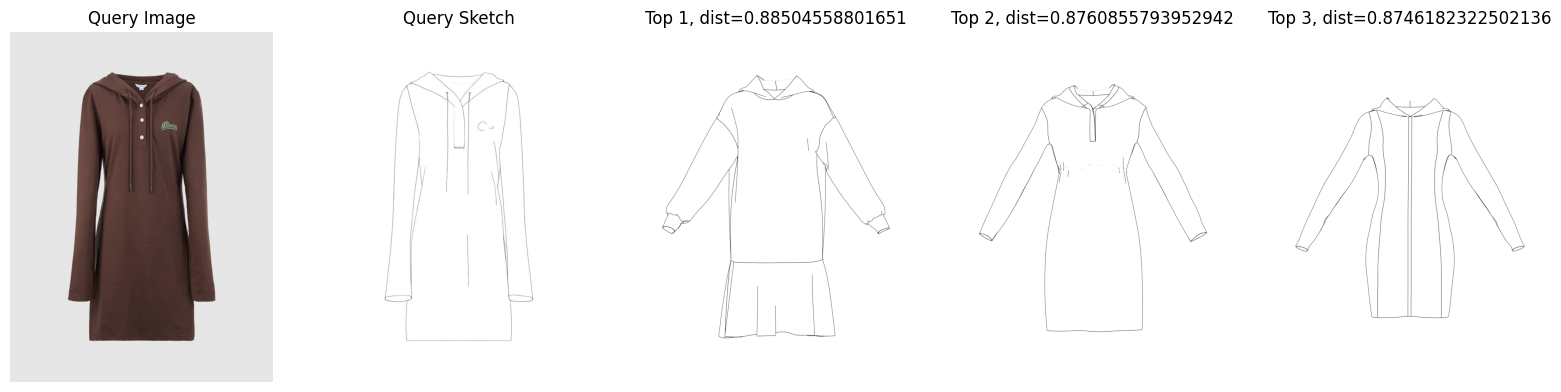

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


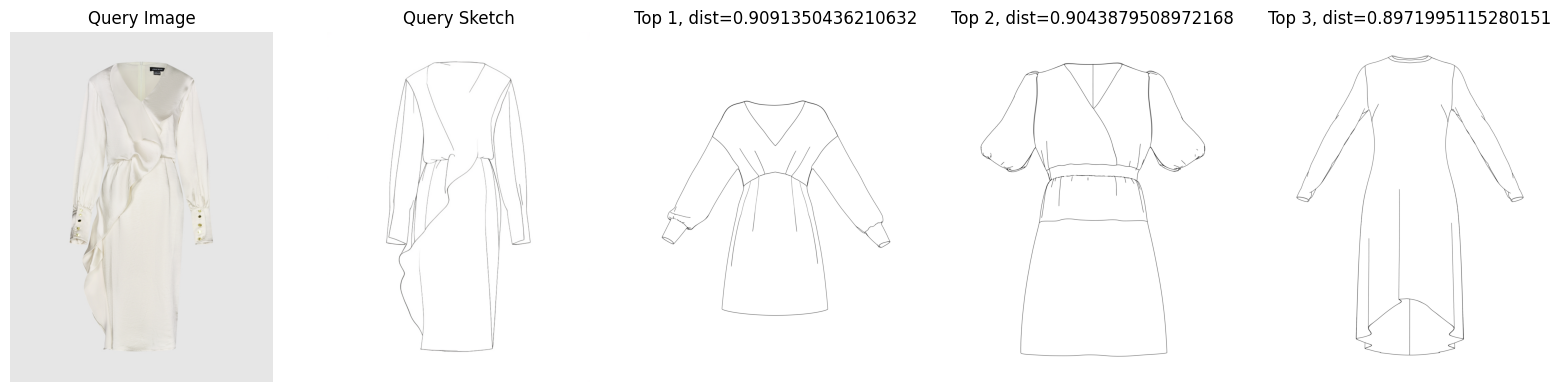

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]


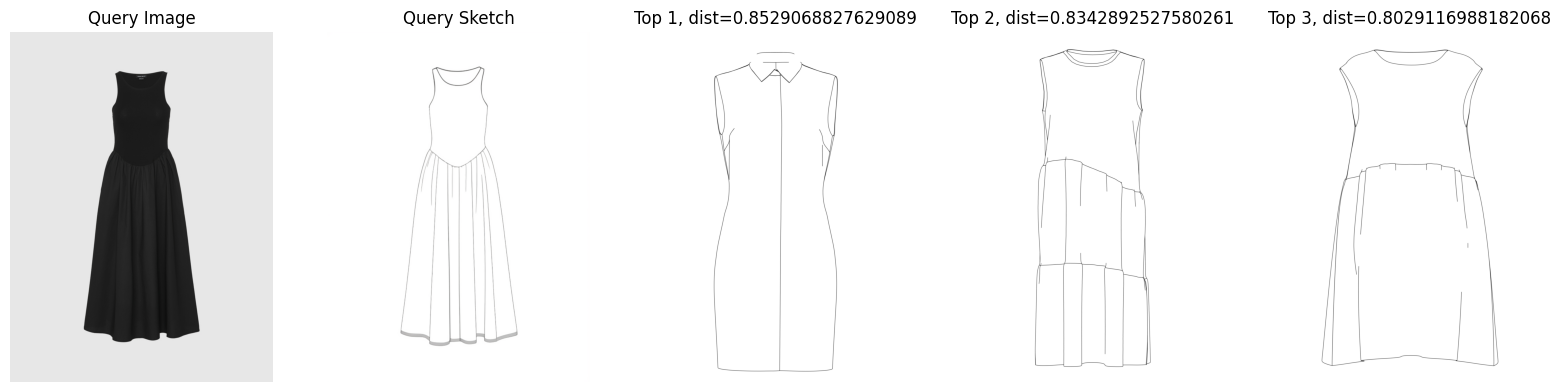

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]


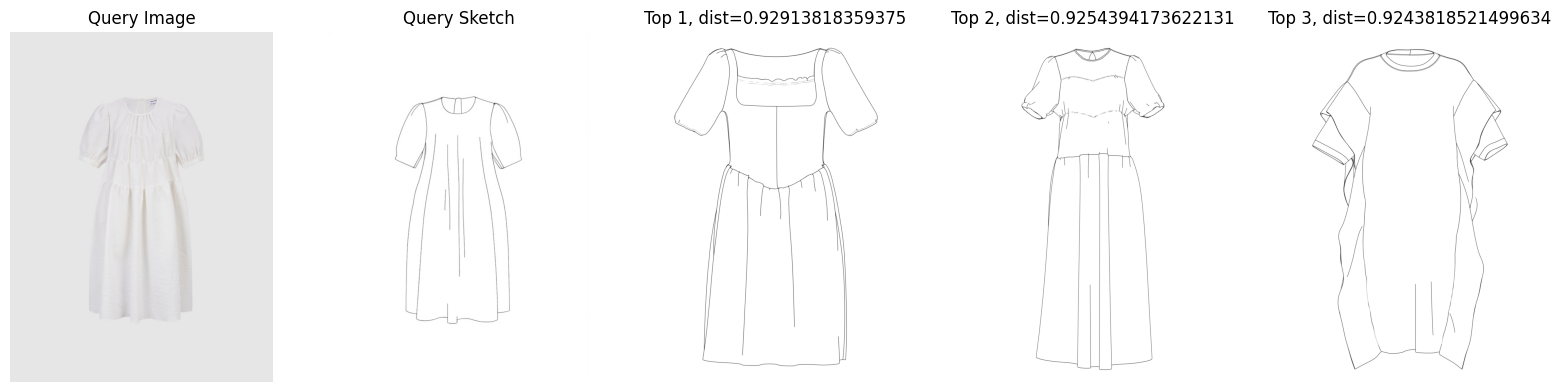

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


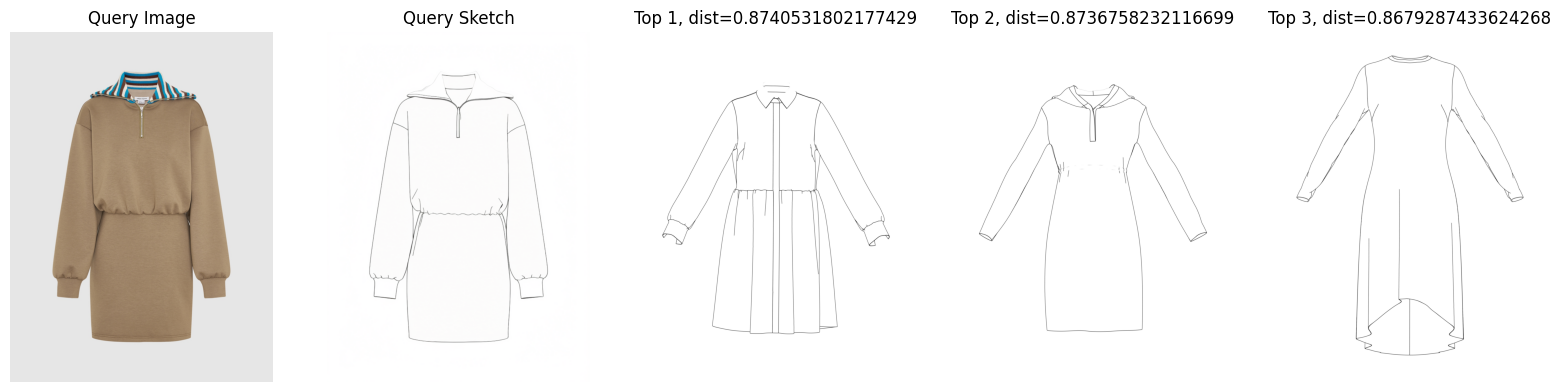

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


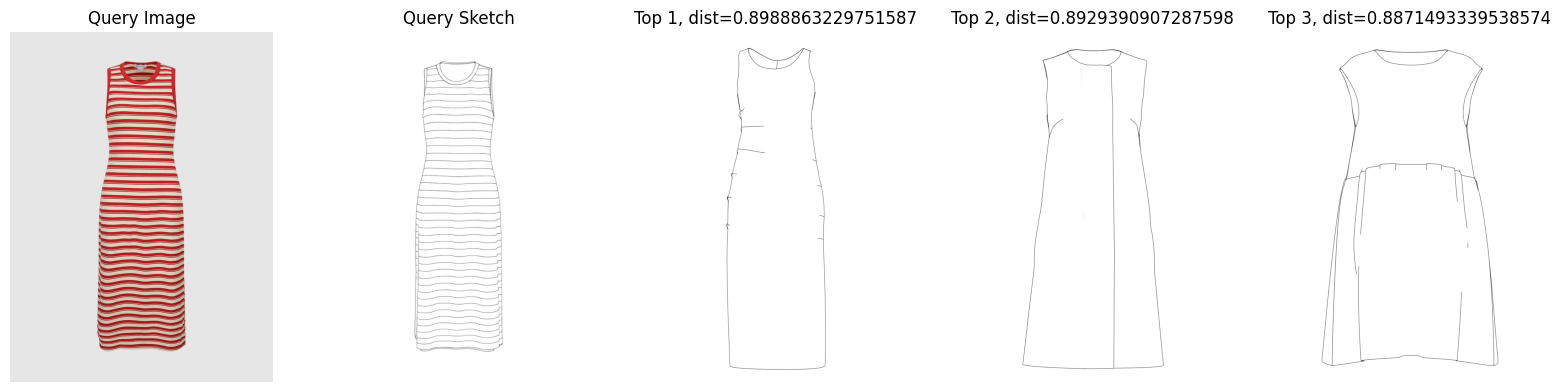

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.32it/s]


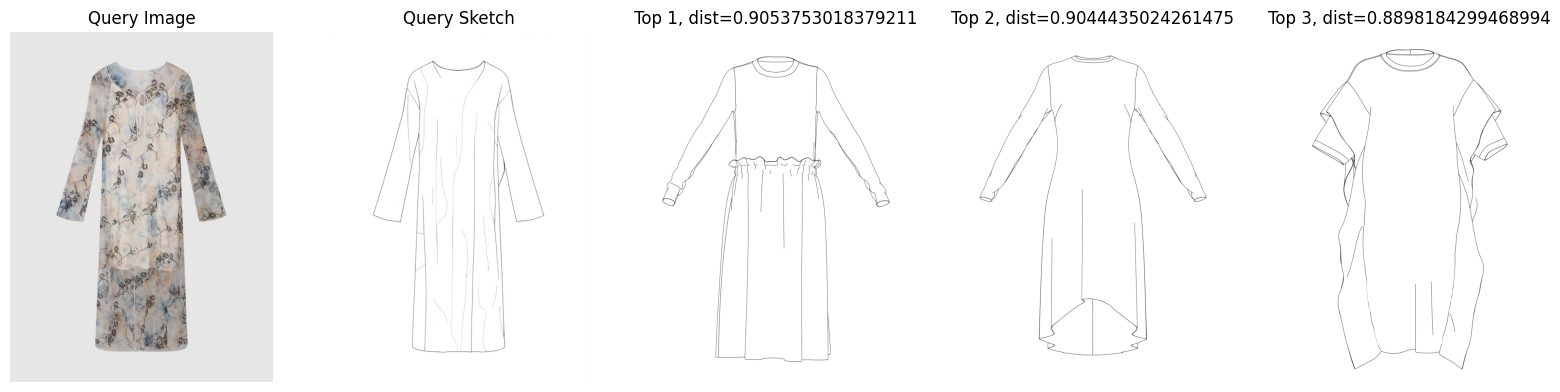

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


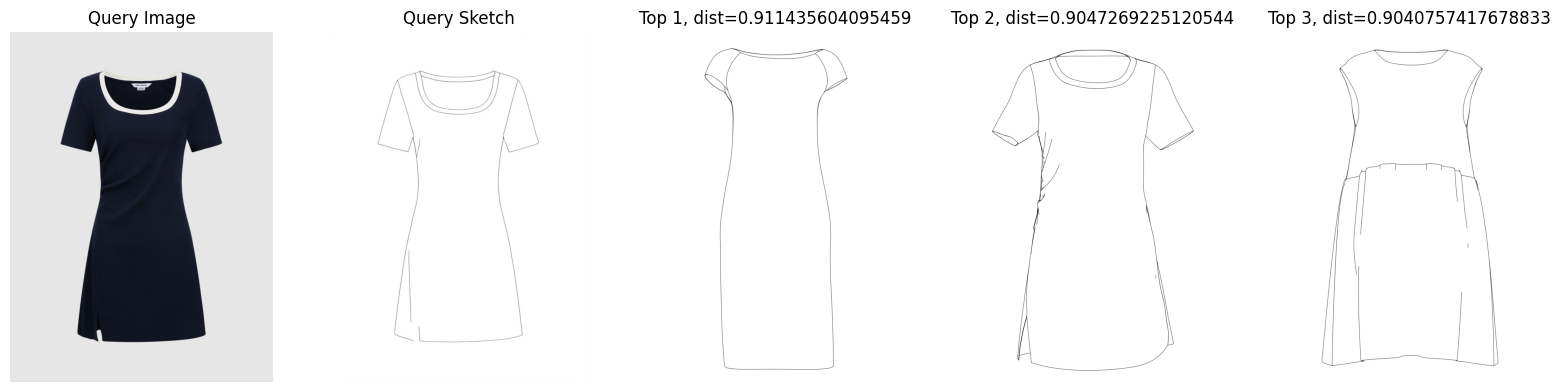

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.31it/s]


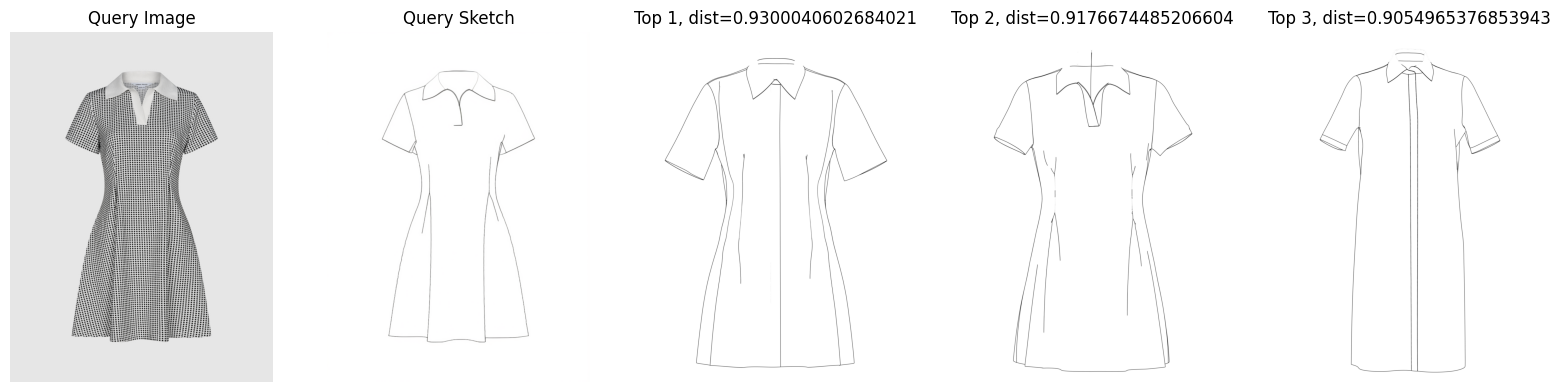

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


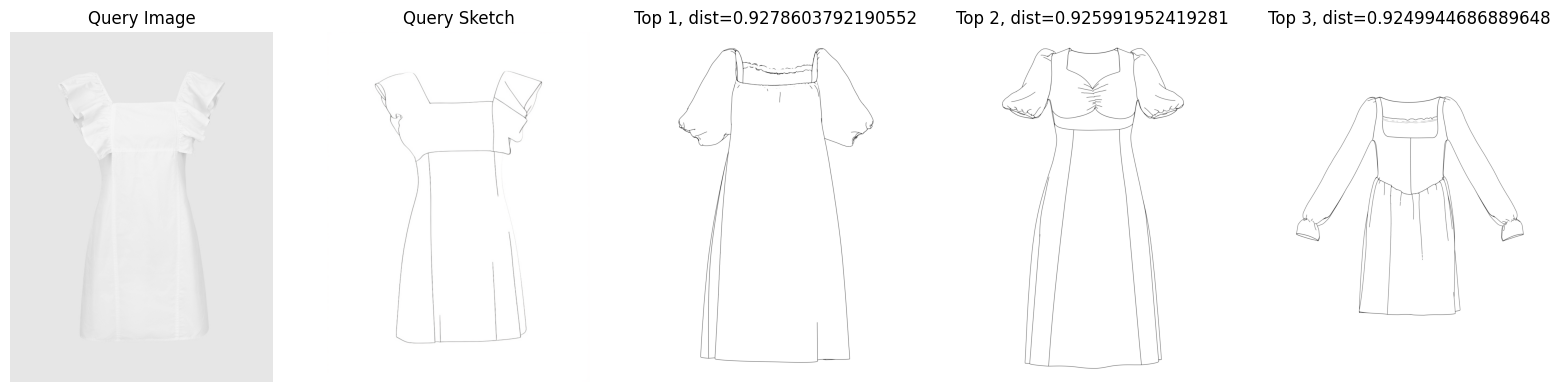

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


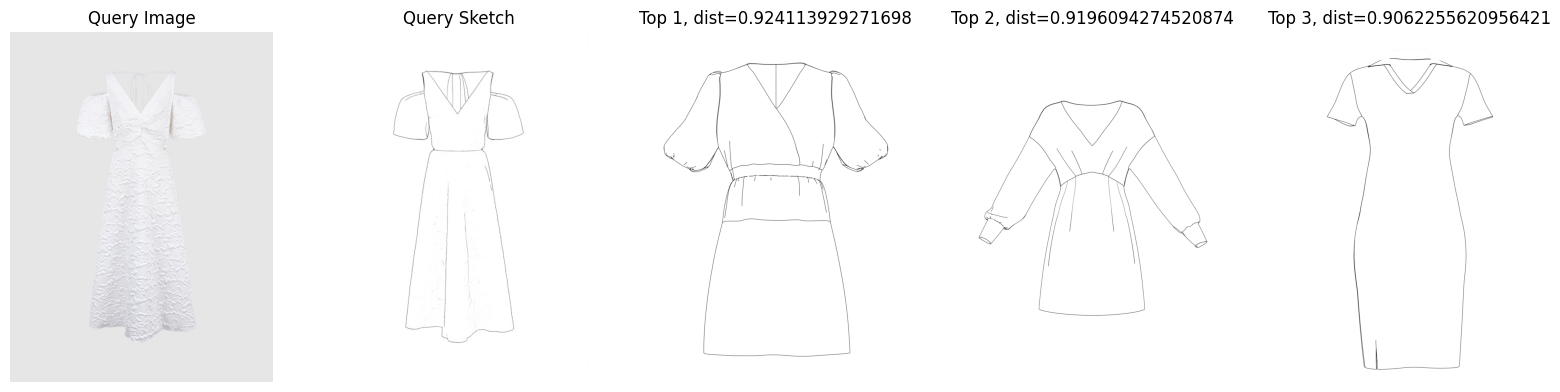

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.30it/s]


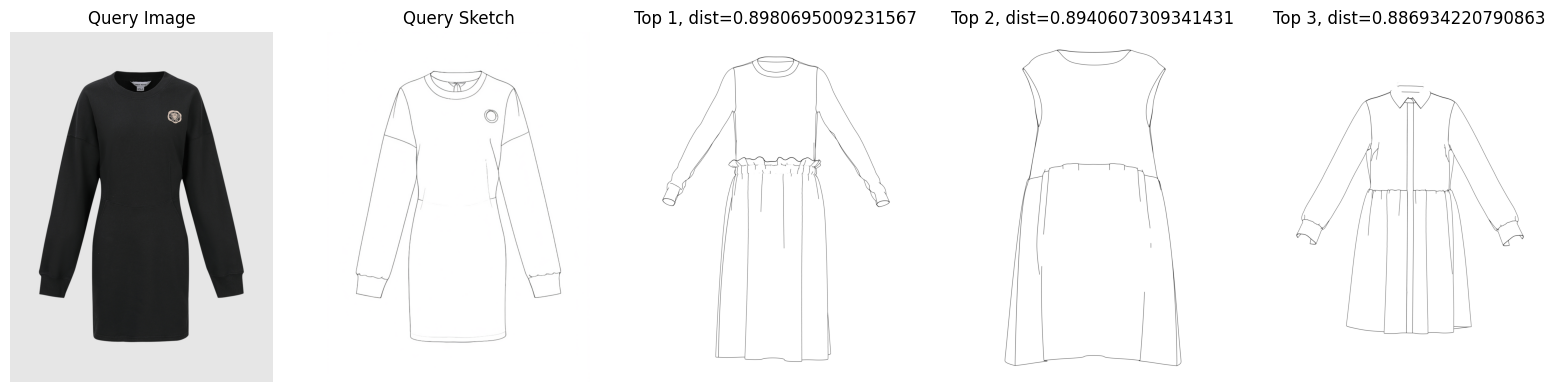

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


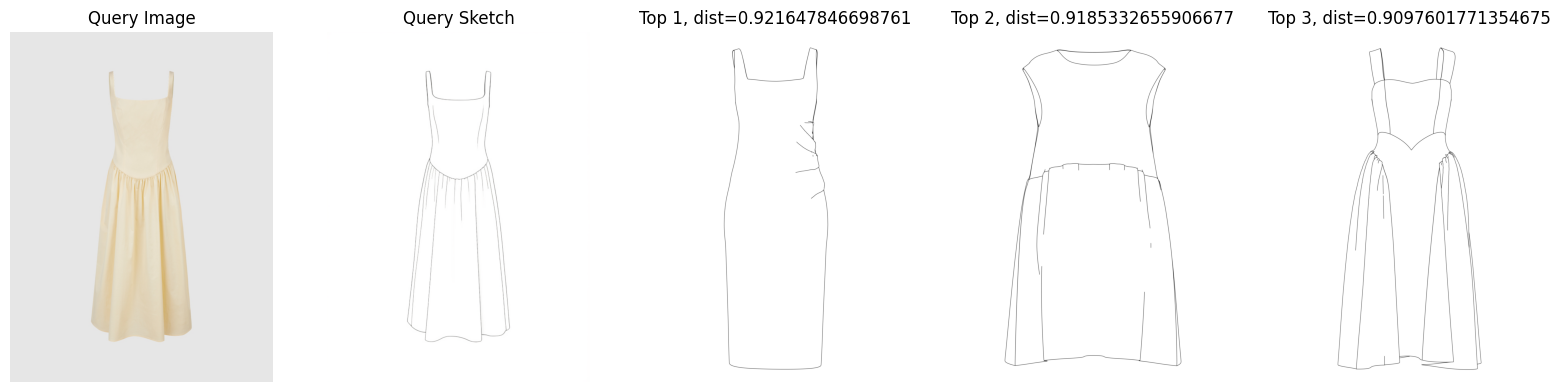

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]


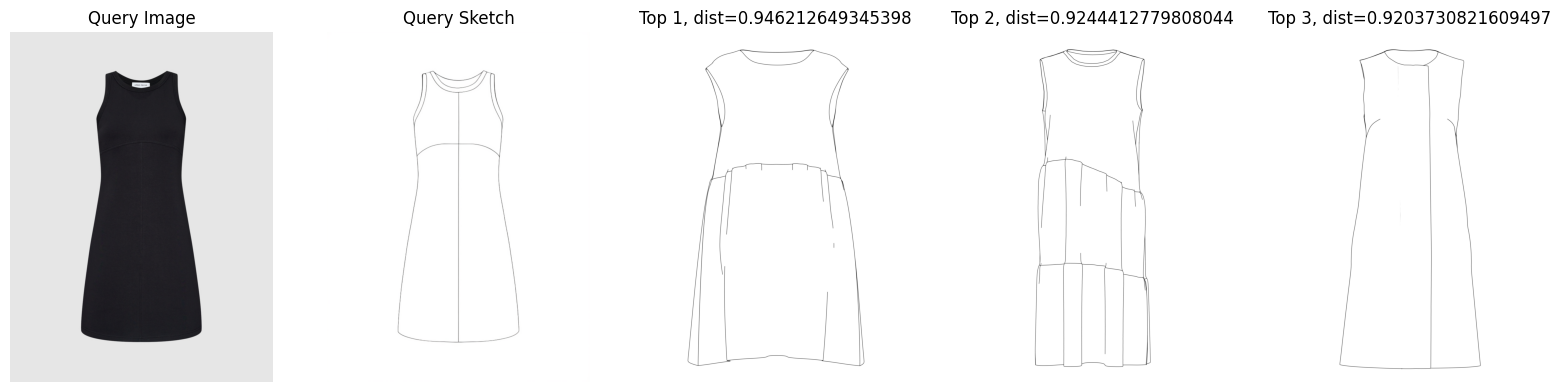

encode: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]


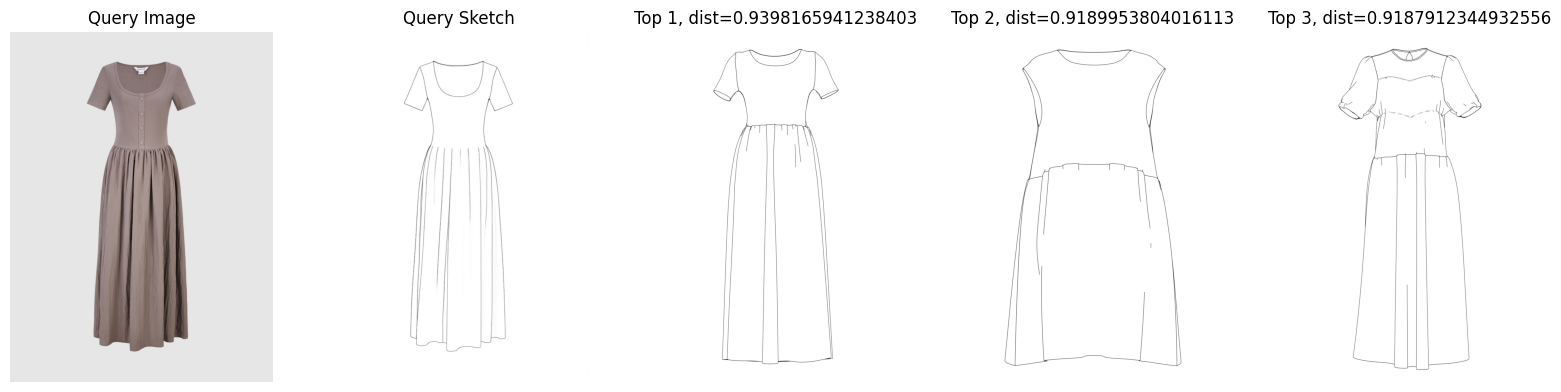

In [2]:
from matplotlib import pyplot as plt

# Query
query_data_root = 'resources/examples/test_annotation/pred_sketches_with_annotations'

for idx, query_data_id in enumerate([os.path.basename(x).split('.')[0].split('_')[0] for x in glob(os.path.join(query_data_root, '*.md'))]):

    query_sketch = os.path.join(query_data_root, f'{query_data_id}_1.png')
    query_image = os.path.join(query_data_root, f'{query_data_id}_0.jpg')
    query_desc_fp = os.path.join(query_data_root, f'{query_data_id}_0.md')

    with open(query_desc_fp, 'r') as f: query_desc = f.read()
    emb_vec = gme_embedder.get_fused_embeddings(texts=[query_desc], images=[query_sketch])

    query_res = client.search(
        collection_name="stylexd_simple_retrieval", 
        data=[emb_vec.squeeze().detach().cpu().numpy().astype(np.float32)], 
        limit=5,
        output_fields=["vector", "data_id", "desc_fp", "sketch_fp", "img_fp"],
        search_params={"metric_type": "COSINE"}
        )

    query_res = query_res[0]

    fig = plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 5, 1)
    plt.axis('off')
    plt.imshow(Image.open(query_image))
    plt.title('Query Image', fontsize=12)

    plt.subplot(1, 5, 2)
    plt.axis('off')
    plt.imshow(Image.open(query_sketch))
    plt.title('Query Sketch', fontsize=12)

    plt.subplot(1, 5, 3)
    plt.axis('off')
    plt.imshow(Image.open(query_res[0]['entity']['sketch_fp']))
    query_dist = query_res[0]['distance']
    plt.title(f'Top 1, dist={query_dist}', fontsize=12)

    plt.subplot(1, 5, 4)
    plt.axis('off')
    plt.imshow(Image.open(query_res[1]['entity']['sketch_fp']))
    query_dist = query_res[1]['distance']
    plt.title(f'Top 2, dist={query_dist}', fontsize=12)

    if len(query_res) > 2:
        plt.subplot(1, 5, 5)
        plt.axis('off')
        plt.imshow(Image.open(query_res[2]['entity']['sketch_fp']))
        query_dist = query_res[2]['distance']
        plt.title(f'Top 3, dist={query_dist}', fontsize=12)

    plt.tight_layout()
    fig.savefig(query_image.replace('.jpg', '_result.jpg'), dpi=fig.dpi)
    plt.show()

    # emb_vec = gme_embedder.get_fused_embeddings(texts=[ref_desc], images=[ref_sketch])
    # print('emb_vec: ', emb_vec.shape)

    # data.append({
    #     "id": idx,
    #     "vector": emb_vec.squeeze().detach().cpu().numpy().astype(np.float32),
    #     "data_id": ref_data_id,
    #     "desc_fp": ref_desc_fp,
    #     "sketch_fp": ref_sketch,
    #     "img_fp": ref_image
    # })
